# data
## data
### data
#### data
##### data
- scheme:

__GET:__ 

```python

cool = True

cool_string = f'I am a {cool} string'
dirty_string = 'I am a dirty and' + ' unefficient string'

```

In [1]:
import missingno
from IPython.display import set_matplotlib_formats
%matplotlib inline
set_matplotlib_formats('svg')

In [2]:
import numpy as np
import pandas as pd
from sqlalchemy import create_engine
sqlitedb_path = '../data/raw/raw_data_project_m1.db'
engine = create_engine(f'sqlite:///{sqlitedb_path}')
pd.read_sql_query("SELECT name FROM sqlite_master WHERE type='table'", engine)


,name
0,personal_info
1,country_info
2,career_info
3,poll_info


# Personal


In [3]:
df_personal = pd.read_sql("SELECT * FROM personal_info", engine)
print(df_personal.shape)
print(df_personal.dtypes)
print(df_personal.info(memory_usage='deep'))
df_personal

(9649, 5)
uuid                object
age                 object
gender              object
dem_has_children    object
age_group           object
dtype: object
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9649 entries, 0 to 9648
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   uuid              9649 non-null   object
 1   age               9649 non-null   object
 2   gender            9649 non-null   object
 3   dem_has_children  9649 non-null   object
 4   age_group         9649 non-null   object
dtypes: object(5)
memory usage: 3.2 MB
None


,uuid,age,gender,dem_has_children,age_group
0,f6e7ee00-deac-0133-4de8-0a81e8b09a82,61 years old,male,NO,40_65
1,54f0f1c0-dda1-0133-a559-0a81e8b09a82,57 years old,male,yES,40_65
2,83127080-da3d-0133-c74f-0a81e8b09a82,32 years old,male,nO,26_39
3,15626d40-db13-0133-ea5c-0a81e8b09a82,45 years old,Male,YES,40_65
4,24954a70-db98-0133-4a64-0a81e8b09a82,41 years old,Fem,yES,40_65
...,...,...,...,...,...
9644,7d1ac020-dcb4-0133-817a-0a81e8b09a82,37 years old,FeMale,nO,26_39
9645,39f989f0-db52-0133-8482-0a81e8b09a82,53 years old,Male,yES,40_65
9646,70ce4a90-d965-0133-f5e4-0a81e8b09a82,1992,male,NO,juvenile
9647,2896e440-db3c-0133-5b67-0a81e8b09a82,47 years old,male,yES,40_65


In [4]:
df_personal.columns

Index(['uuid', 'age', 'gender', 'dem_has_children', 'age_group'], dtype='object')

In [5]:
df_personal.nunique()

uuid                9649
age                   52
gender                 5
dem_has_children       4
age_group              4
dtype: int64

### Personal column age

In [6]:
df_personal['age'].unique()

array(['61 years old', '57 years old', '32 years old', '45 years old',
       '41 years old', '1990', '47 years old', '34 years old', '1994',
       '49 years old', '58 years old', '1991', '40 years old',
       '37 years old', '48 years old', '31 years old', '1999', '1989',
       '2001', '35 years old', '51 years old', '1988', '42 years old',
       '33 years old', '64 years old', '38 years old', '55 years old',
       '1992', '1993', '36 years old', '46 years old', '1998',
       '44 years old', '1996', '65 years old', '1995', '52 years old',
       '2002', '50 years old', '1997', '43 years old', '1987', '1986',
       '39 years old', '53 years old', '62 years old', '2000',
       '54 years old', '56 years old', '59 years old', '60 years old',
       '63 years old'], dtype=object)

In [7]:
df_personal['age'] = df_personal['age'].str.replace(' years old', '')

In [8]:
df_personal['age'].unique()

array(['61', '57', '32', '45', '41', '1990', '47', '34', '1994', '49',
       '58', '1991', '40', '37', '48', '31', '1999', '1989', '2001', '35',
       '51', '1988', '42', '33', '64', '38', '55', '1992', '1993', '36',
       '46', '1998', '44', '1996', '65', '1995', '52', '2002', '50',
       '1997', '43', '1987', '1986', '39', '53', '62', '2000', '54', '56',
       '59', '60', '63'], dtype=object)

In [9]:
for x in range(1980,2050):
    df_personal['age'] = df_personal['age'].str.replace(f'{x}',f'{2020-x}') #????????????2020????????????????????

In [10]:
df_personal.nunique()

uuid                9649
age                   48
gender                 5
dem_has_children       4
age_group              4
dtype: int64

In [11]:
df_personal['age'] = df_personal['age'].astype('int64')
df_personal.dtypes

uuid                object
age                  int64
gender              object
dem_has_children    object
age_group           object
dtype: object

In [12]:
df_personal['age'].sort_values().unique()

array([18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
       52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65])

### Personal column gender


In [13]:
df_personal['gender'].unique()

array(['male', 'Male', 'Fem', 'FeMale', 'female'], dtype=object)

In [14]:
df_personal['gender'].value_counts()

male      3796
female    2581
Male      1298
FeMale    1125
Fem        849
Name: gender, dtype: int64

In [15]:
male=df_personal['gender'].value_counts().loc['male']+df_personal['gender'].value_counts().loc['Male']
male

5094

In [16]:
df_personal['gender'] = df_personal['gender'].str.replace(r'\bMale\b', 'male')\
                                             .str.replace(r'\bFem\b', 'female')\
                                             .str.replace(r'\bFeMale\b', 'female')

In [17]:
df_personal['gender'].unique()

array(['male', 'female'], dtype=object)

In [18]:
df_personal['gender'].value_counts().loc['male']

5094

In [19]:
df_personal.nunique()

uuid                9649
age                   48
gender                 2
dem_has_children       4
age_group              4
dtype: int64

In [20]:
df_personal['gender'] = df_personal['gender'].astype('category')

### Personal column dem_has_children

In [21]:
df_personal['dem_has_children'].unique()

array(['NO', 'yES', 'nO', 'YES'], dtype=object)

In [22]:
no=df_personal['dem_has_children'].value_counts().loc['NO']+df_personal['dem_has_children'].value_counts().loc['nO']
no

4600

In [23]:
df_personal['dem_has_children'] = df_personal['dem_has_children'].str.replace(r'\bNO\b', 'no')\
                                                                 .str.replace(r'\byES\b', 'yes')\
                                                                 .str.replace(r'\bnO\b', 'no')\
                                                                 .str.replace(r'\bYES\b', 'yes')

In [24]:
df_personal['dem_has_children'].value_counts().loc['no']

4600

In [25]:
df_personal['dem_has_children'].unique()

array(['no', 'yes'], dtype=object)

In [26]:
df_personal.nunique()

uuid                9649
age                   48
gender                 2
dem_has_children       2
age_group              4
dtype: int64

In [27]:
df_personal['dem_has_children'] = df_personal['dem_has_children'].astype('category')

### Personal column age_group

In [28]:
df_personal['age_group'].unique()

array(['40_65', '26_39', 'juvenile', '14_25'], dtype=object)

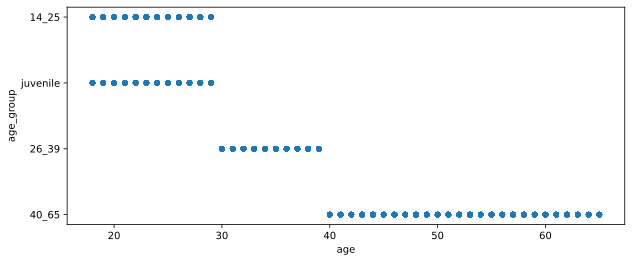

In [29]:
df_personal.plot.scatter(x='age',y='age_group',figsize=(10,4))

In [30]:
df_personal['age_group'] = df_personal['age_group'].str.replace(r'\bjuvenile\b', '14_25')

In [31]:
df_personal['age_group'].unique()

array(['40_65', '26_39', '14_25'], dtype=object)

In [32]:
df_personal['age_group'].value_counts()

40_65    4896
26_39    2813
14_25    1940
Name: age_group, dtype: int64

In [33]:
df_personal[['age','age_group']]

,age,age_group
0,61,40_65
1,57,40_65
2,32,26_39
3,45,40_65
4,41,40_65
...,...,...
9644,37,26_39
9645,53,40_65
9646,28,14_25
9647,47,40_65


In [34]:
for x in range(26,30):
    df_personal.loc[df_personal['age']==x,'age_group']='26_39'

In [35]:
k=[]
v=[]
for x in df_personal['age']:
    k.append(x)
    v.append(df_personal.loc[df_personal['age']==x,:]['age_group'].unique().tolist())
dic=dict(zip(k,v))  

In [36]:
sd=sorted(dic.items())

In [37]:
sd

[(18, ['14_25']),
 (19, ['14_25']),
 (20, ['14_25']),
 (21, ['14_25']),
 (22, ['14_25']),
 (23, ['14_25']),
 (24, ['14_25']),
 (25, ['14_25']),
 (26, ['26_39']),
 (27, ['26_39']),
 (28, ['26_39']),
 (29, ['26_39']),
 (30, ['26_39']),
 (31, ['26_39']),
 (32, ['26_39']),
 (33, ['26_39']),
 (34, ['26_39']),
 (35, ['26_39']),
 (36, ['26_39']),
 (37, ['26_39']),
 (38, ['26_39']),
 (39, ['26_39']),
 (40, ['40_65']),
 (41, ['40_65']),
 (42, ['40_65']),
 (43, ['40_65']),
 (44, ['40_65']),
 (45, ['40_65']),
 (46, ['40_65']),
 (47, ['40_65']),
 (48, ['40_65']),
 (49, ['40_65']),
 (50, ['40_65']),
 (51, ['40_65']),
 (52, ['40_65']),
 (53, ['40_65']),
 (54, ['40_65']),
 (55, ['40_65']),
 (56, ['40_65']),
 (57, ['40_65']),
 (58, ['40_65']),
 (59, ['40_65']),
 (60, ['40_65']),
 (61, ['40_65']),
 (62, ['40_65']),
 (63, ['40_65']),
 (64, ['40_65']),
 (65, ['40_65'])]

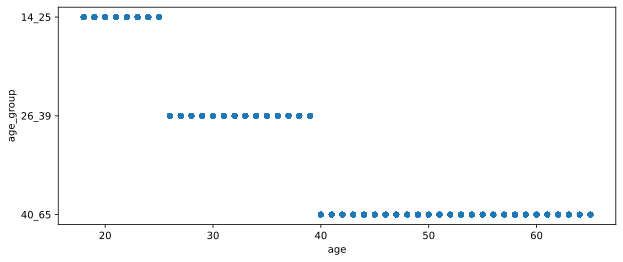

In [38]:
df_personal.plot.scatter(x='age',y='age_group',figsize=(10, 4))

In [39]:
df_personal['age_group'] = df_personal['age_group'].astype('category')

In [40]:
print(df_personal.shape)
print(df_personal.dtypes)
print(df_personal.info(memory_usage='deep'))
df_personal

(9649, 5)
uuid                  object
age                    int64
gender              category
dem_has_children    category
age_group           category
dtype: object
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9649 entries, 0 to 9648
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   uuid              9649 non-null   object  
 1   age               9649 non-null   int64   
 2   gender            9649 non-null   category
 3   dem_has_children  9649 non-null   category
 4   age_group         9649 non-null   category
dtypes: category(3), int64(1), object(1)
memory usage: 980.8 KB
None


,uuid,age,gender,dem_has_children,age_group
0,f6e7ee00-deac-0133-4de8-0a81e8b09a82,61,male,no,40_65
1,54f0f1c0-dda1-0133-a559-0a81e8b09a82,57,male,yes,40_65
2,83127080-da3d-0133-c74f-0a81e8b09a82,32,male,no,26_39
3,15626d40-db13-0133-ea5c-0a81e8b09a82,45,male,yes,40_65
4,24954a70-db98-0133-4a64-0a81e8b09a82,41,female,yes,40_65
...,...,...,...,...,...
9644,7d1ac020-dcb4-0133-817a-0a81e8b09a82,37,female,no,26_39
9645,39f989f0-db52-0133-8482-0a81e8b09a82,53,male,yes,40_65
9646,70ce4a90-d965-0133-f5e4-0a81e8b09a82,28,male,no,26_39
9647,2896e440-db3c-0133-5b67-0a81e8b09a82,47,male,yes,40_65


In [42]:
df_personal.to_parquet('../data/processed/df_personal.parquet')

# Country


In [45]:
df_country = pd.read_sql("SELECT * FROM country_info", engine)
print(df_country.shape)
print(df_country.dtypes)
print(df_country.info(memory_usage='deep'))
df_country

(9649, 3)
uuid            object
country_code    object
rural           object
dtype: object
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9649 entries, 0 to 9648
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   uuid          9649 non-null   object
 1   country_code  9649 non-null   object
 2   rural         9649 non-null   object
dtypes: object(3)
memory usage: 2.0 MB
None


,uuid,country_code,rural
0,f6e7ee00-deac-0133-4de8-0a81e8b09a82,AT,countryside
1,54f0f1c0-dda1-0133-a559-0a81e8b09a82,AT,urban
2,83127080-da3d-0133-c74f-0a81e8b09a82,AT,city
3,15626d40-db13-0133-ea5c-0a81e8b09a82,AT,Country
4,24954a70-db98-0133-4a64-0a81e8b09a82,AT,city
...,...,...,...
9644,7d1ac020-dcb4-0133-817a-0a81e8b09a82,SK,urban
9645,39f989f0-db52-0133-8482-0a81e8b09a82,SK,urban
9646,70ce4a90-d965-0133-f5e4-0a81e8b09a82,SK,Non-Rural
9647,2896e440-db3c-0133-5b67-0a81e8b09a82,SK,city


In [46]:
df_country.columns

Index(['uuid', 'country_code', 'rural'], dtype='object')

In [47]:
df_country.nunique()

uuid            9649
country_code      28
rural              6
dtype: int64

### Country column country_code


In [48]:
df_country['country_code'].unique()

array(['AT', 'BE', 'BG', 'CY', 'CZ', 'DE', 'DK', 'EE', 'ES', 'FI', 'FR',
       'GB', 'GR', 'HR', 'HU', 'IE', 'IT', 'LT', 'LU', 'LV', 'MT', 'NL',
       'PL', 'PT', 'RO', 'SE', 'SI', 'SK'], dtype=object)

In [49]:
df_country['country_code'].value_counts()

DE    1420
FR    1248
GB    1199
IT    1138
ES    1005
PL     860
RO     332
NL     331
GR     225
HU     206
PT     202
CZ     189
BE     179
SE     175
BG     141
AT     133
DK     119
FI     113
SK      93
IE      90
HR      87
LT      50
LV      36
SI      28
EE      18
CY      13
LU      11
MT       8
Name: country_code, dtype: int64

In [50]:
df_country['country_code'] = df_country['country_code'].astype('category')

### Country column rural

In [51]:
df_country['rural'].unique()

array(['countryside', 'urban', 'city', 'Country', 'rural', 'Non-Rural'],
      dtype=object)

In [52]:
df_country['rural'].value_counts()

urban          3842
city           1664
rural          1517
Non-Rural      1372
Country         772
countryside     482
Name: rural, dtype: int64

In [53]:
urban=df_country['rural'].value_counts().loc['urban']+df_country['rural'].value_counts().loc['city']+\
df_country['rural'].value_counts().loc['Non-Rural']
urban

6878

In [54]:
rural=df_country['rural'].value_counts().loc['rural']+df_country['rural'].value_counts().loc['Country']+\
df_country['rural'].value_counts().loc['countryside']
rural

2771

In [55]:
urban+rural

9649

In [56]:
df_country['rural'] = df_country['rural'].str.replace(r'\bcity\b', 'urban')\
                                         .str.replace(r'\bNon-Rural\b', 'urban')\
                                         .str.replace(r'\bCountry\b', 'rural')\
                                         .str.replace(r'\bcountryside\b', 'rural')\

In [57]:
df_country['rural'].value_counts()

urban    6878
rural    2771
Name: rural, dtype: int64

In [58]:
df_country['rural'] = df_country['rural'].astype('category')

In [59]:
print(df_country.shape)
print(df_country.dtypes)
print(df_country.info(memory_usage='deep'))
df_country

(9649, 3)
uuid              object
country_code    category
rural           category
dtype: object
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9649 entries, 0 to 9648
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   uuid          9649 non-null   object  
 1   country_code  9649 non-null   category
 2   rural         9649 non-null   category
dtypes: category(2), object(1)
memory usage: 898.4 KB
None


,uuid,country_code,rural
0,f6e7ee00-deac-0133-4de8-0a81e8b09a82,AT,rural
1,54f0f1c0-dda1-0133-a559-0a81e8b09a82,AT,urban
2,83127080-da3d-0133-c74f-0a81e8b09a82,AT,urban
3,15626d40-db13-0133-ea5c-0a81e8b09a82,AT,rural
4,24954a70-db98-0133-4a64-0a81e8b09a82,AT,urban
...,...,...,...
9644,7d1ac020-dcb4-0133-817a-0a81e8b09a82,SK,urban
9645,39f989f0-db52-0133-8482-0a81e8b09a82,SK,urban
9646,70ce4a90-d965-0133-f5e4-0a81e8b09a82,SK,urban
9647,2896e440-db3c-0133-5b67-0a81e8b09a82,SK,urban


In [60]:
df_country.to_parquet('../data/processed/df_country.parquet')

# Career


In [63]:
df_career = pd.read_sql("SELECT * FROM career_info", engine)
print(df_career.shape)
print(df_career.dtypes)
print(df_career.info(memory_usage='deep'))
df_career

(9649, 4)
uuid                   object
dem_education_level    object
dem_full_time_job      object
normalized_job_code    object
dtype: object
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9649 entries, 0 to 9648
Data columns (total 4 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   uuid                 9649 non-null   object
 1   dem_education_level  8986 non-null   object
 2   dem_full_time_job    9649 non-null   object
 3   normalized_job_code  5702 non-null   object
dtypes: object(4)
memory usage: 2.5 MB
None


,uuid,dem_education_level,dem_full_time_job,normalized_job_code
0,f6e7ee00-deac-0133-4de8-0a81e8b09a82,no,no,None
1,54f0f1c0-dda1-0133-a559-0a81e8b09a82,high,yes,861a9b9151e11362eb3c77ca914172d0
2,83127080-da3d-0133-c74f-0a81e8b09a82,None,no,None
3,15626d40-db13-0133-ea5c-0a81e8b09a82,high,yes,049a3f3a2b5f85cb2971ba77ad66e10c
4,24954a70-db98-0133-4a64-0a81e8b09a82,high,yes,f4b2fb1aa40f661488e2782b6d57ad2f
...,...,...,...,...
9644,7d1ac020-dcb4-0133-817a-0a81e8b09a82,high,yes,847165cfda6b1dc82ae22b967da8af2f
9645,39f989f0-db52-0133-8482-0a81e8b09a82,high,yes,a4d5b8b38f9513825d0d94a981ebe962
9646,70ce4a90-d965-0133-f5e4-0a81e8b09a82,low,no,None
9647,2896e440-db3c-0133-5b67-0a81e8b09a82,low,yes,775190277a849cba701b306a7b374c0a


In [64]:
df_career.columns

Index(['uuid', 'dem_education_level', 'dem_full_time_job',
       'normalized_job_code'],
      dtype='object')

In [65]:
df_career.nunique()

uuid                   9649
dem_education_level       4
dem_full_time_job         2
normalized_job_code     156
dtype: int64

### Career column dem_education_level

In [66]:
df_career['dem_education_level'].unique()

array(['no', 'high', None, 'medium', 'low'], dtype=object)

In [67]:
round(df_career['dem_education_level'].isnull().sum()/df_career['dem_education_level'].shape[0]*100,2)

6.87

In [68]:
df_career['dem_education_level'].value_counts()

medium    3578
high      3270
low       1815
no         323
Name: dem_education_level, dtype: int64

### Career column dem_full_time_job

In [69]:
df_career['dem_full_time_job'].unique()

array(['no', 'yes'], dtype=object)

In [70]:
df_career['dem_full_time_job'].value_counts()

yes    5702
no     3947
Name: dem_full_time_job, dtype: int64

In [71]:
df_career['dem_full_time_job']= df_career['dem_full_time_job'].astype('category')

### Career column normalized_job_code

In [72]:
df_career['normalized_job_code'].value_counts()

775190277a849cba701b306a7b374c0a    101
dac2e921c1f887d9efc4c06fa33c1397     88
049a3f3a2b5f85cb2971ba77ad66e10c     88
fcaf4aac737e53ad24b9f32f08b8740f     88
d4624ed8068d24948e18303212593cd6     88
                                   ... 
58eaf730050d2e23c7361fbb782e30a2      6
5285758deb04c98f58cbae2747195f33      5
7aecc34a90868aac810bf3693b11534e      5
631bc3a12ed11340fc94ebfffa8f5f4e      4
b42566382f2d3deeca56d3667004fc9e      4
Name: normalized_job_code, Length: 156, dtype: int64

In [73]:
round(df_career['normalized_job_code'].isnull().sum()/df_career['normalized_job_code'].shape[0]*100,2)

40.91

In [74]:
print(df_career.shape)
print(df_career.dtypes)
print(df_career.info(memory_usage='deep'))
df_career

(9649, 4)
uuid                     object
dem_education_level      object
dem_full_time_job      category
normalized_job_code      object
dtype: object
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9649 entries, 0 to 9648
Data columns (total 4 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   uuid                 9649 non-null   object  
 1   dem_education_level  8986 non-null   object  
 2   dem_full_time_job    9649 non-null   category
 3   normalized_job_code  5702 non-null   object  
dtypes: category(1), object(3)
memory usage: 2.0 MB
None


,uuid,dem_education_level,dem_full_time_job,normalized_job_code
0,f6e7ee00-deac-0133-4de8-0a81e8b09a82,no,no,None
1,54f0f1c0-dda1-0133-a559-0a81e8b09a82,high,yes,861a9b9151e11362eb3c77ca914172d0
2,83127080-da3d-0133-c74f-0a81e8b09a82,None,no,None
3,15626d40-db13-0133-ea5c-0a81e8b09a82,high,yes,049a3f3a2b5f85cb2971ba77ad66e10c
4,24954a70-db98-0133-4a64-0a81e8b09a82,high,yes,f4b2fb1aa40f661488e2782b6d57ad2f
...,...,...,...,...
9644,7d1ac020-dcb4-0133-817a-0a81e8b09a82,high,yes,847165cfda6b1dc82ae22b967da8af2f
9645,39f989f0-db52-0133-8482-0a81e8b09a82,high,yes,a4d5b8b38f9513825d0d94a981ebe962
9646,70ce4a90-d965-0133-f5e4-0a81e8b09a82,low,no,None
9647,2896e440-db3c-0133-5b67-0a81e8b09a82,low,yes,775190277a849cba701b306a7b374c0a


In [75]:
df_career.to_parquet('../data/processed/df_career.parquet')

# Poll


In [76]:
df_poll = pd.read_sql("SELECT * FROM poll_info", engine)
print(df_poll.shape)
print(df_poll.dtypes)
print(df_poll.info(memory_usage='deep'))
df_poll

(9649, 6)
uuid                                                   object
question_bbi_2016wave4_basicincome_awareness           object
question_bbi_2016wave4_basicincome_vote                object
question_bbi_2016wave4_basicincome_effect              object
question_bbi_2016wave4_basicincome_argumentsfor        object
question_bbi_2016wave4_basicincome_argumentsagainst    object
dtype: object
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9649 entries, 0 to 9648
Data columns (total 6 columns):
 #   Column                                               Non-Null Count  Dtype 
---  ------                                               --------------  ----- 
 0   uuid                                                 9649 non-null   object
 1   question_bbi_2016wave4_basicincome_awareness         9649 non-null   object
 2   question_bbi_2016wave4_basicincome_vote              9649 non-null   object
 3   question_bbi_2016wave4_basicincome_effect            9649 non-null   object
 4   questio

,uuid,question_bbi_2016wave4_basicincome_awareness,question_bbi_2016wave4_basicincome_vote,question_bbi_2016wave4_basicincome_effect,question_bbi_2016wave4_basicincome_argumentsfor,question_bbi_2016wave4_basicincome_argumentsagainst
0,f6e7ee00-deac-0133-4de8-0a81e8b09a82,I know something about it,I would not vote,None of the above,None of the above,None of the above
1,54f0f1c0-dda1-0133-a559-0a81e8b09a82,I understand it fully,I would probably vote for it,A basic income would not affect my work choices,It increases appreciation for household work a...,It might encourage people to stop working
2,83127080-da3d-0133-c74f-0a81e8b09a82,I have heard just a little about it,I would not vote,‰Û_ gain additional skills,It creates more equality of opportunity,Foreigners might come to my country and take a...
3,15626d40-db13-0133-ea5c-0a81e8b09a82,I have heard just a little about it,I would probably vote for it,‰Û_ work less,It reduces anxiety about financing basic needs,None of the above
4,24954a70-db98-0133-4a64-0a81e8b09a82,I have heard just a little about it,I would probably vote for it,None of the above,It reduces anxiety about financing basic needs,It is impossible to finance | It might encoura...
...,...,...,...,...,...,...
9644,7d1ac020-dcb4-0133-817a-0a81e8b09a82,I understand it fully,I would probably vote for it,‰Û_ spend more time with my family,It reduces bureaucracy and administrative expe...,It is impossible to finance
9645,39f989f0-db52-0133-8482-0a81e8b09a82,I have never heard of it,I would probably vote against it,A basic income would not affect my work choices,It reduces bureaucracy and administrative expe...,It might encourage people to stop working | On...
9646,70ce4a90-d965-0133-f5e4-0a81e8b09a82,I have heard just a little about it,I would not vote,‰Û_ spend more time with my family,It reduces anxiety about financing basic needs,None of the above
9647,2896e440-db3c-0133-5b67-0a81e8b09a82,I understand it fully,I would vote for it,A basic income would not affect my work choices,It reduces bureaucracy and administrative expe...,Foreigners might come to my country and take a...


In [77]:
df_poll.columns

Index(['uuid', 'question_bbi_2016wave4_basicincome_awareness',
       'question_bbi_2016wave4_basicincome_vote',
       'question_bbi_2016wave4_basicincome_effect',
       'question_bbi_2016wave4_basicincome_argumentsfor',
       'question_bbi_2016wave4_basicincome_argumentsagainst'],
      dtype='object')

In [78]:
df_poll.nunique()

uuid                                                   9649
question_bbi_2016wave4_basicincome_awareness              4
question_bbi_2016wave4_basicincome_vote                   5
question_bbi_2016wave4_basicincome_effect                 9
question_bbi_2016wave4_basicincome_argumentsfor         674
question_bbi_2016wave4_basicincome_argumentsagainst     881
dtype: int64

In [79]:
df_poll.columns=['uuid', 'awareness',
       'vote',
       'effect',
       'argumentsfor',
       'argumentsagainst']

In [80]:
df_poll.columns

Index(['uuid', 'awareness', 'vote', 'effect', 'argumentsfor',
       'argumentsagainst'],
      dtype='object')


### Poll column question_bbi_2016wave4_basicincome_awareness

In [81]:
df_poll['awareness'].unique()

array(['I know something about it', 'I understand it fully',
       'I have heard just a little about it', 'I have never heard of it'],
      dtype=object)

In [82]:
df_poll['awareness'].value_counts()

I know something about it              3389
I understand it fully                  2389
I have heard just a little about it    2305
I have never heard of it               1566
Name: awareness, dtype: int64

In [83]:
df_poll['awareness']= df_poll['awareness'].astype('category')


### Poll column question_bbi_2016wave4_basicincome_vote

In [84]:
df_poll['vote'].unique()

array(['I would not vote', 'I would probably vote for it',
       'I would vote against it', 'I would vote for it',
       'I would probably vote against it'], dtype=object)

In [85]:
df_poll['vote'].value_counts()

I would probably vote for it        3272
I would vote for it                 2819
I would probably vote against it    1439
I would not vote                    1159
I would vote against it              960
Name: vote, dtype: int64

In [86]:
df_poll['vote']= df_poll['vote'].astype('category')


### Poll column question_bbi_2016wave4_basicincome_effect

In [87]:
df_poll['effect'].unique()

array(['None of the above',
       'A basic income would not affect my work choices',
       '‰Û_ gain additional skills', '‰Û_ work less',
       '‰Û_ work as a freelancer', '‰Û_ do more volunteering work',
       '‰Û_ stop working', '‰Û_ spend more time with my family',
       '‰Û_ look for a different job'], dtype=object)

In [88]:
df_poll['effect'].value_counts()

A basic income would not affect my work choices    3349
‰Û_ spend more time with my family                 1387
None of the above                                  1227
‰Û_ gain additional skills                          970
‰Û_ look for a different job                        640
‰Û_ work less                                       629
‰Û_ do more volunteering work                       615
‰Û_ work as a freelancer                            465
‰Û_ stop working                                    367
Name: effect, dtype: int64

In [89]:
df_poll['effect'] = df_poll['effect'].str.replace(r'‰Û_', 'I')

In [90]:
df_poll['effect'].value_counts()

A basic income would not affect my work choices    3349
I spend more time with my family                   1387
None of the above                                  1227
I gain additional skills                            970
I look for a different job                          640
I work less                                         629
I do more volunteering work                         615
I work as a freelancer                              465
I stop working                                      367
Name: effect, dtype: int64

In [91]:
df_poll['effect']= df_poll['effect'].astype('category')


### Poll column question_bbi_2016wave4_basicincome_argumentsfor

In [92]:
df_poll['argumentsfor'].value_counts().head(19)

None of the above                                                                                                 2163
It reduces anxiety about financing basic needs                                                                    1273
It creates more equality of opportunity                                                                            848
It encourages financial independence and self-responsibility                                                       583
It increases solidarity, because it is funded by everyone                                                          479
It increases appreciation for household work and volunteering                                                      394
It reduces bureaucracy and administrative expenses                                                                 357
It reduces anxiety about financing basic needs | It creates more equality of opportunity                           176
It creates more equality of opportunity | It red

In [93]:
round(df_poll['argumentsfor'].value_counts().head(19).sum()/df_poll['argumentsfor'].shape[0]*100,2)

74.89


### Poll column question_bbi_2016wave4_basicincome_argumentsagainst

In [94]:
df_poll['argumentsagainst'].value_counts().head(13)

None of the above                                                                                                    1381
Only the people who need it most should get something from the state                                                  875
It might encourage people to stop working                                                                             823
It is impossible to finance                                                                                           767
Foreigners might come to my country and take advantage of the benefit                                                 632
It increases dependence on the state                                                                                  376
It is against the principle of linking merit and reward                                                               326
It might encourage people to stop working | Foreigners might come to my country and take advantage of the benefit     163
Foreigners might come to

In [95]:
round(df_poll['argumentsagainst'].value_counts().head(13).sum()/df_poll['argumentsagainst'].shape[0]*100,2)

60.94

In [96]:
df_poll.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9649 entries, 0 to 9648
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   uuid              9649 non-null   object  
 1   awareness         9649 non-null   category
 2   vote              9649 non-null   category
 3   effect            9649 non-null   category
 4   argumentsfor      9649 non-null   object  
 5   argumentsagainst  9649 non-null   object  
dtypes: category(3), object(3)
memory usage: 3.6 MB


In [97]:
df_poll.to_parquet('../data/processed/df_poll.parquet')